# PHASE 4 CAPSTONE PROJECT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

import warnings

warnings.filterwarnings("ignore")

**4.1**

In [2]:
df=pd.read_csv("crime_data.csv")

In [3]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,ANDAMAN,2001,13,0,0,3,0,3,2,...,4,113,0,18,1,9,0,0,310,637
1,A & N ISLANDS,NICOBAR,2001,0,0,0,0,0,0,0,...,0,5,0,1,0,0,0,0,13,21
2,A & N ISLANDS,TOTAL,2001,13,0,0,3,0,3,2,...,4,118,0,19,1,9,0,0,323,658
3,A & N ISLANDS,ANDAMAN,2002,14,3,0,1,0,1,2,...,2,92,0,16,3,4,0,0,316,580
4,A & N ISLANDS,NICOBAR,2002,3,0,1,1,0,1,0,...,0,5,0,1,0,0,0,0,12,28


In [4]:
data = pd.read_csv('crime_data.csv')

data = data[data['DISTRICT'] != 'TOTAL']
data = data[data['DISTRICT'] != 'DELHI UT TOTAL']

# Aggregate data by district
district_crime_data = data.groupby(['STATE/UT', 'DISTRICT']).mean().reset_index()

In [5]:
district_crime_data.drop('YEAR',axis=1,inplace=True)

In [6]:
district_crime_data

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,A and N ISLANDS,15.000000,19.000000,1.000000,3.000000,0.0,3.000000,12.000000,9.000000,...,11.0,99.000000,1.000000,21.000000,2.000000,18.000000,0.000000,4.000000,337.000000,807.000000
1,A & N ISLANDS,ANDAMAN,11.800000,4.100000,1.800000,9.200000,0.0,9.200000,7.300000,6.100000,...,8.0,91.000000,0.300000,16.800000,3.700000,9.700000,0.000000,3.200000,363.800000,737.700000
2,A & N ISLANDS,CAR,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,...,0.0,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,8.000000,24.000000
3,A & N ISLANDS,NICOBAR,1.200000,0.200000,0.200000,0.200000,0.0,0.200000,0.100000,0.000000,...,0.3,3.400000,0.000000,0.800000,0.000000,0.100000,0.000000,0.000000,11.700000,23.500000
4,A & N ISLANDS,NORTH,5.000000,0.000000,0.000000,4.000000,0.0,4.000000,0.000000,0.000000,...,0.0,8.000000,0.000000,2.000000,1.000000,2.000000,0.000000,0.000000,70.000000,115.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,WEST BENGAL,PURULIA,61.083333,1.000000,7.083333,41.416667,0.0,41.416667,23.000000,16.500000,...,2.0,17.083333,8.833333,50.083333,0.000000,148.166667,0.000000,17.166667,664.666667,1413.166667
823,WEST BENGAL,SEALDAH G.R.P.,15.666667,4.833333,1.750000,1.583333,0.0,1.583333,5.583333,3.000000,...,0.0,20.583333,0.916667,4.666667,0.166667,0.833333,0.000000,0.333333,45.750000,395.500000
824,WEST BENGAL,SILIGURI G.R.P.,3.500000,0.250000,0.500000,0.166667,0.0,0.166667,2.583333,1.916667,...,0.0,0.000000,0.250000,2.583333,0.083333,0.083333,0.000000,0.000000,34.416667,146.666667
825,WEST BENGAL,SILIGURI_PC,32.000000,6.000000,6.000000,21.000000,0.0,21.000000,123.000000,111.000000,...,3.0,812.000000,3.000000,35.000000,12.000000,370.000000,0.000000,69.000000,385.000000,3023.000000


All the districts mean aggregate has been accumlated, For example Mean total ipc crimes for Andaman district across all years is 807 .

By this we can determine district whose mean is high and that district commits higher crimes

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize the crime rate
scaler = StandardScaler()
district_crime_data['CRIME_RATE_SCALED'] = scaler.fit_transform(district_crime_data[['TOTAL IPC CRIMES']])

As it is fixed that we need 3 clusters there is no need to use the elbow method

In [8]:
from sklearn.cluster import KMeans

# Define the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
district_crime_data['CLUSTER'] = kmeans.fit_predict(district_crime_data[['CRIME_RATE_SCALED']])

In [9]:
district_crime_data.head()

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_RATE_SCALED,CLUSTER
0,A & N ISLANDS,A and N ISLANDS,15.0,19.0,1.0,3.0,0.0,3.0,12.0,9.0,...,1.0,21.0,2.0,18.0,0.0,4.0,337.0,807.0,-0.628908,0
1,A & N ISLANDS,ANDAMAN,11.8,4.1,1.8,9.2,0.0,9.2,7.3,6.1,...,0.3,16.8,3.7,9.7,0.0,3.2,363.8,737.7,-0.651051,0
2,A & N ISLANDS,CAR,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,8.0,24.0,-0.879096,0
3,A & N ISLANDS,NICOBAR,1.2,0.2,0.2,0.2,0.0,0.2,0.1,0.0,...,0.0,0.8,0.0,0.1,0.0,0.0,11.7,23.5,-0.879256,0
4,A & N ISLANDS,NORTH,5.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,2.0,1.0,2.0,0.0,0.0,70.0,115.0,-0.850020,0


In [10]:
cluster_map = {
    district_crime_data.groupby('CLUSTER')['TOTAL IPC CRIMES'].mean().idxmax(): 'Sensitive Area',
    district_crime_data.groupby('CLUSTER')['TOTAL IPC CRIMES'].mean().idxmin(): 'Peaceful Area'
}
# Remaining cluster is 'Moderate Area'
remaining_cluster = set([0, 1, 2]) - set(cluster_map.keys())
for cluster in remaining_cluster:
    cluster_map[cluster] = 'Moderate Area'

district_crime_data['AREA_TYPE'] = district_crime_data['CLUSTER'].map(cluster_map)

In [11]:
district_crime_data

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_RATE_SCALED,CLUSTER,AREA_TYPE
0,A & N ISLANDS,A and N ISLANDS,15.000000,19.000000,1.000000,3.000000,0.0,3.000000,12.000000,9.000000,...,21.000000,2.000000,18.000000,0.000000,4.000000,337.000000,807.000000,-0.628908,0,Peaceful Area
1,A & N ISLANDS,ANDAMAN,11.800000,4.100000,1.800000,9.200000,0.0,9.200000,7.300000,6.100000,...,16.800000,3.700000,9.700000,0.000000,3.200000,363.800000,737.700000,-0.651051,0,Peaceful Area
2,A & N ISLANDS,CAR,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,8.000000,24.000000,-0.879096,0,Peaceful Area
3,A & N ISLANDS,NICOBAR,1.200000,0.200000,0.200000,0.200000,0.0,0.200000,0.100000,0.000000,...,0.800000,0.000000,0.100000,0.000000,0.000000,11.700000,23.500000,-0.879256,0,Peaceful Area
4,A & N ISLANDS,NORTH,5.000000,0.000000,0.000000,4.000000,0.0,4.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,0.000000,0.000000,70.000000,115.000000,-0.850020,0,Peaceful Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,WEST BENGAL,PURULIA,61.083333,1.000000,7.083333,41.416667,0.0,41.416667,23.000000,16.500000,...,50.083333,0.000000,148.166667,0.000000,17.166667,664.666667,1413.166667,-0.435223,0,Peaceful Area
823,WEST BENGAL,SEALDAH G.R.P.,15.666667,4.833333,1.750000,1.583333,0.0,1.583333,5.583333,3.000000,...,4.666667,0.166667,0.833333,0.000000,0.333333,45.750000,395.500000,-0.760393,0,Peaceful Area
824,WEST BENGAL,SILIGURI G.R.P.,3.500000,0.250000,0.500000,0.166667,0.0,0.166667,2.583333,1.916667,...,2.583333,0.083333,0.083333,0.000000,0.000000,34.416667,146.666667,-0.839901,0,Peaceful Area
825,WEST BENGAL,SILIGURI_PC,32.000000,6.000000,6.000000,21.000000,0.0,21.000000,123.000000,111.000000,...,35.000000,12.000000,370.000000,0.000000,69.000000,385.000000,3023.000000,0.079158,0,Peaceful Area


**4.2 Create DataFrame for each cluster that shows data according to the areas.**

***Peaceful Area***

In [12]:
peaceful_area=district_crime_data[district_crime_data["AREA_TYPE"]=="Peaceful Area"]
peaceful_area.head()

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_RATE_SCALED,CLUSTER,AREA_TYPE
0,A & N ISLANDS,A and N ISLANDS,15.0,19.0,1.0,3.0,0.0,3.0,12.0,9.0,...,21.0,2.0,18.0,0.0,4.0,337.0,807.0,-0.628908,0,Peaceful Area
1,A & N ISLANDS,ANDAMAN,11.8,4.1,1.8,9.2,0.0,9.2,7.3,6.1,...,16.8,3.7,9.7,0.0,3.2,363.8,737.7,-0.651051,0,Peaceful Area
2,A & N ISLANDS,CAR,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,8.0,24.0,-0.879096,0,Peaceful Area
3,A & N ISLANDS,NICOBAR,1.2,0.2,0.2,0.2,0.0,0.2,0.1,0.0,...,0.8,0.0,0.1,0.0,0.0,11.7,23.5,-0.879256,0,Peaceful Area
4,A & N ISLANDS,NORTH,5.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,2.0,1.0,2.0,0.0,0.0,70.0,115.0,-0.850020,0,Peaceful Area


***Moderate Area***

In [13]:
moderate_area=district_crime_data[district_crime_data["AREA_TYPE"]=="Moderate Area"]
moderate_area.head()

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_RATE_SCALED,CLUSTER,AREA_TYPE
6,ANDHRA PRADESH,ADILABAD,98.833333,72.416667,12.583333,56.000000,0.0,56.000000,62.833333,47.500000,...,148.750000,103.500000,343.833333,0.0,299.416667,1714.916667,5163.250000,0.763021,2,Moderate Area
7,ANDHRA PRADESH,ANANTAPUR,160.166667,104.000000,4.250000,22.166667,0.0,22.166667,69.916667,46.166667,...,168.833333,51.833333,137.083333,0.0,421.500000,1321.750000,4993.916667,0.708915,2,Moderate Area
8,ANDHRA PRADESH,CHITTOOR,105.833333,61.583333,2.666667,30.666667,0.0,30.666667,75.583333,44.250000,...,115.083333,181.583333,273.583333,0.0,680.666667,2047.916667,6289.250000,1.122806,2,Moderate Area
9,ANDHRA PRADESH,CUDDAPAH,99.666667,42.166667,3.166667,24.833333,0.0,24.833333,54.416667,43.500000,...,142.333333,44.833333,149.166667,0.0,401.250000,1832.750000,4845.583333,0.661519,2,Moderate Area
11,ANDHRA PRADESH,EAST GODAVARI,86.750000,100.916667,3.750000,41.583333,0.0,41.583333,65.000000,31.500000,...,160.000000,132.000000,410.583333,0.0,554.583333,1509.416667,7766.083333,1.594691,2,Moderate Area


***Sensitive Area***

In [14]:
sensitive_area=district_crime_data[district_crime_data["AREA_TYPE"]=="Sensitive Area"]
sensitive_area.head()

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_RATE_SCALED,CLUSTER,AREA_TYPE
10,ANDHRA PRADESH,CYBERABAD,181.000000,91.400000,9.600000,64.100000,0.000000,64.100000,139.800000,85.700000,...,137.200000,316.800000,893.200000,0.400000,1031.400000,2370.100000,14174.300000,3.642274,1,Sensitive Area
15,ANDHRA PRADESH,HYDERABAD CITY,121.250000,130.250000,5.416667,59.333333,0.000000,59.333333,122.166667,57.500000,...,174.000000,145.083333,1171.250000,0.166667,497.166667,2372.083333,16910.916667,4.516691,1,Sensitive Area
121,BIHAR,PATNA,382.166667,237.083333,25.083333,47.666667,0.000000,47.666667,291.833333,97.416667,...,23.916667,1.166667,236.500000,3.250000,384.833333,5865.583333,12295.166667,3.041845,1,Sensitive Area
193,GUJARAT,AHMEDABAD COMMR.,100.333333,64.833333,8.416667,42.166667,0.000000,42.166667,191.750000,139.083333,...,68.333333,18.750000,972.500000,0.000000,173.666667,8353.416667,18167.083333,4.918067,1,Sensitive Area
330,KARNATAKA,BANGALORE COMMR.,235.916667,338.916667,4.500000,53.500000,0.083333,53.416667,251.166667,78.916667,...,219.166667,33.916667,319.333333,0.000000,98.500000,10348.000000,29195.583333,8.441946,1,Sensitive Area


**4.3 Analyze your clusters and prepare a report that explains all your observations.**

In [15]:
sensitive_area.iloc[:,2:-1].corr()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,CRIME_RATE_SCALED,CLUSTER
MURDER,1.000000,0.707372,0.216531,0.361653,0.181913,0.361500,0.775480,0.388009,0.888354,0.792974,...,0.770784,-0.064953,0.135900,0.021028,0.467995,0.369841,-0.211119,0.466504,0.466504,NaN
ATTEMPT TO MURDER,0.707372,1.000000,-0.064379,0.112358,0.745450,0.111890,0.587260,0.184225,0.773663,0.477590,...,0.671303,-0.053293,0.082378,-0.134512,0.248697,0.216545,0.083559,0.473029,0.473029,NaN
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,0.216531,-0.064379,1.000000,-0.407357,-0.309039,-0.407121,0.270723,0.115159,0.328817,0.438794,...,0.301078,-0.314506,-0.231135,-0.061579,0.841722,-0.161547,-0.109592,-0.352652,-0.352652,NaN
RAPE,0.361653,0.112358,-0.407357,1.000000,-0.192392,1.000000,0.173923,0.255719,0.043904,0.082831,...,-0.031260,0.693540,0.180319,-0.095261,-0.190418,0.381589,-0.059626,0.687412,0.687412,NaN
CUSTODIAL RAPE,0.181913,0.745450,-0.309039,-0.192392,1.000000,-0.192979,0.135967,-0.105104,0.315177,0.041084,...,0.209732,-0.175159,0.158973,-0.192520,-0.169470,0.088347,0.266401,0.246866,0.246866,NaN
OTHER RAPE,0.361500,0.111890,-0.407121,1.000000,-0.192979,1.000000,0.173820,0.255753,0.043707,0.082797,...,-0.031384,0.693566,0.180201,-0.095132,-0.190293,0.381491,-0.059782,0.687181,0.687181,NaN
KIDNAPPING & ABDUCTION,0.775480,0.587260,0.270723,0.173923,0.135967,0.173820,1.000000,0.820788,0.850496,0.658398,...,0.691028,-0.110500,-0.031826,0.278218,0.423794,0.360215,-0.141026,0.516946,0.516946,NaN
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,0.388009,0.184225,0.115159,0.255719,-0.105104,0.255753,0.820788,1.000000,0.397618,0.266530,...,0.343000,0.006688,0.029066,0.384734,0.199130,0.517808,-0.170131,0.450411,0.450411,NaN
KIDNAPPING AND ABDUCTION OF OTHERS,0.888354,0.773663,0.328817,0.043904,0.315177,0.043707,0.850496,0.397618,1.000000,0.812146,...,0.794145,-0.183651,-0.077884,0.092634,0.497369,0.101812,-0.069871,0.415621,0.415621,NaN
DACOITY,0.792974,0.477590,0.438794,0.082831,0.041084,0.082797,0.658398,0.266530,0.812146,1.000000,...,0.480613,-0.132220,-0.289368,-0.095484,0.488818,-0.117809,-0.048411,0.286655,0.286655,NaN


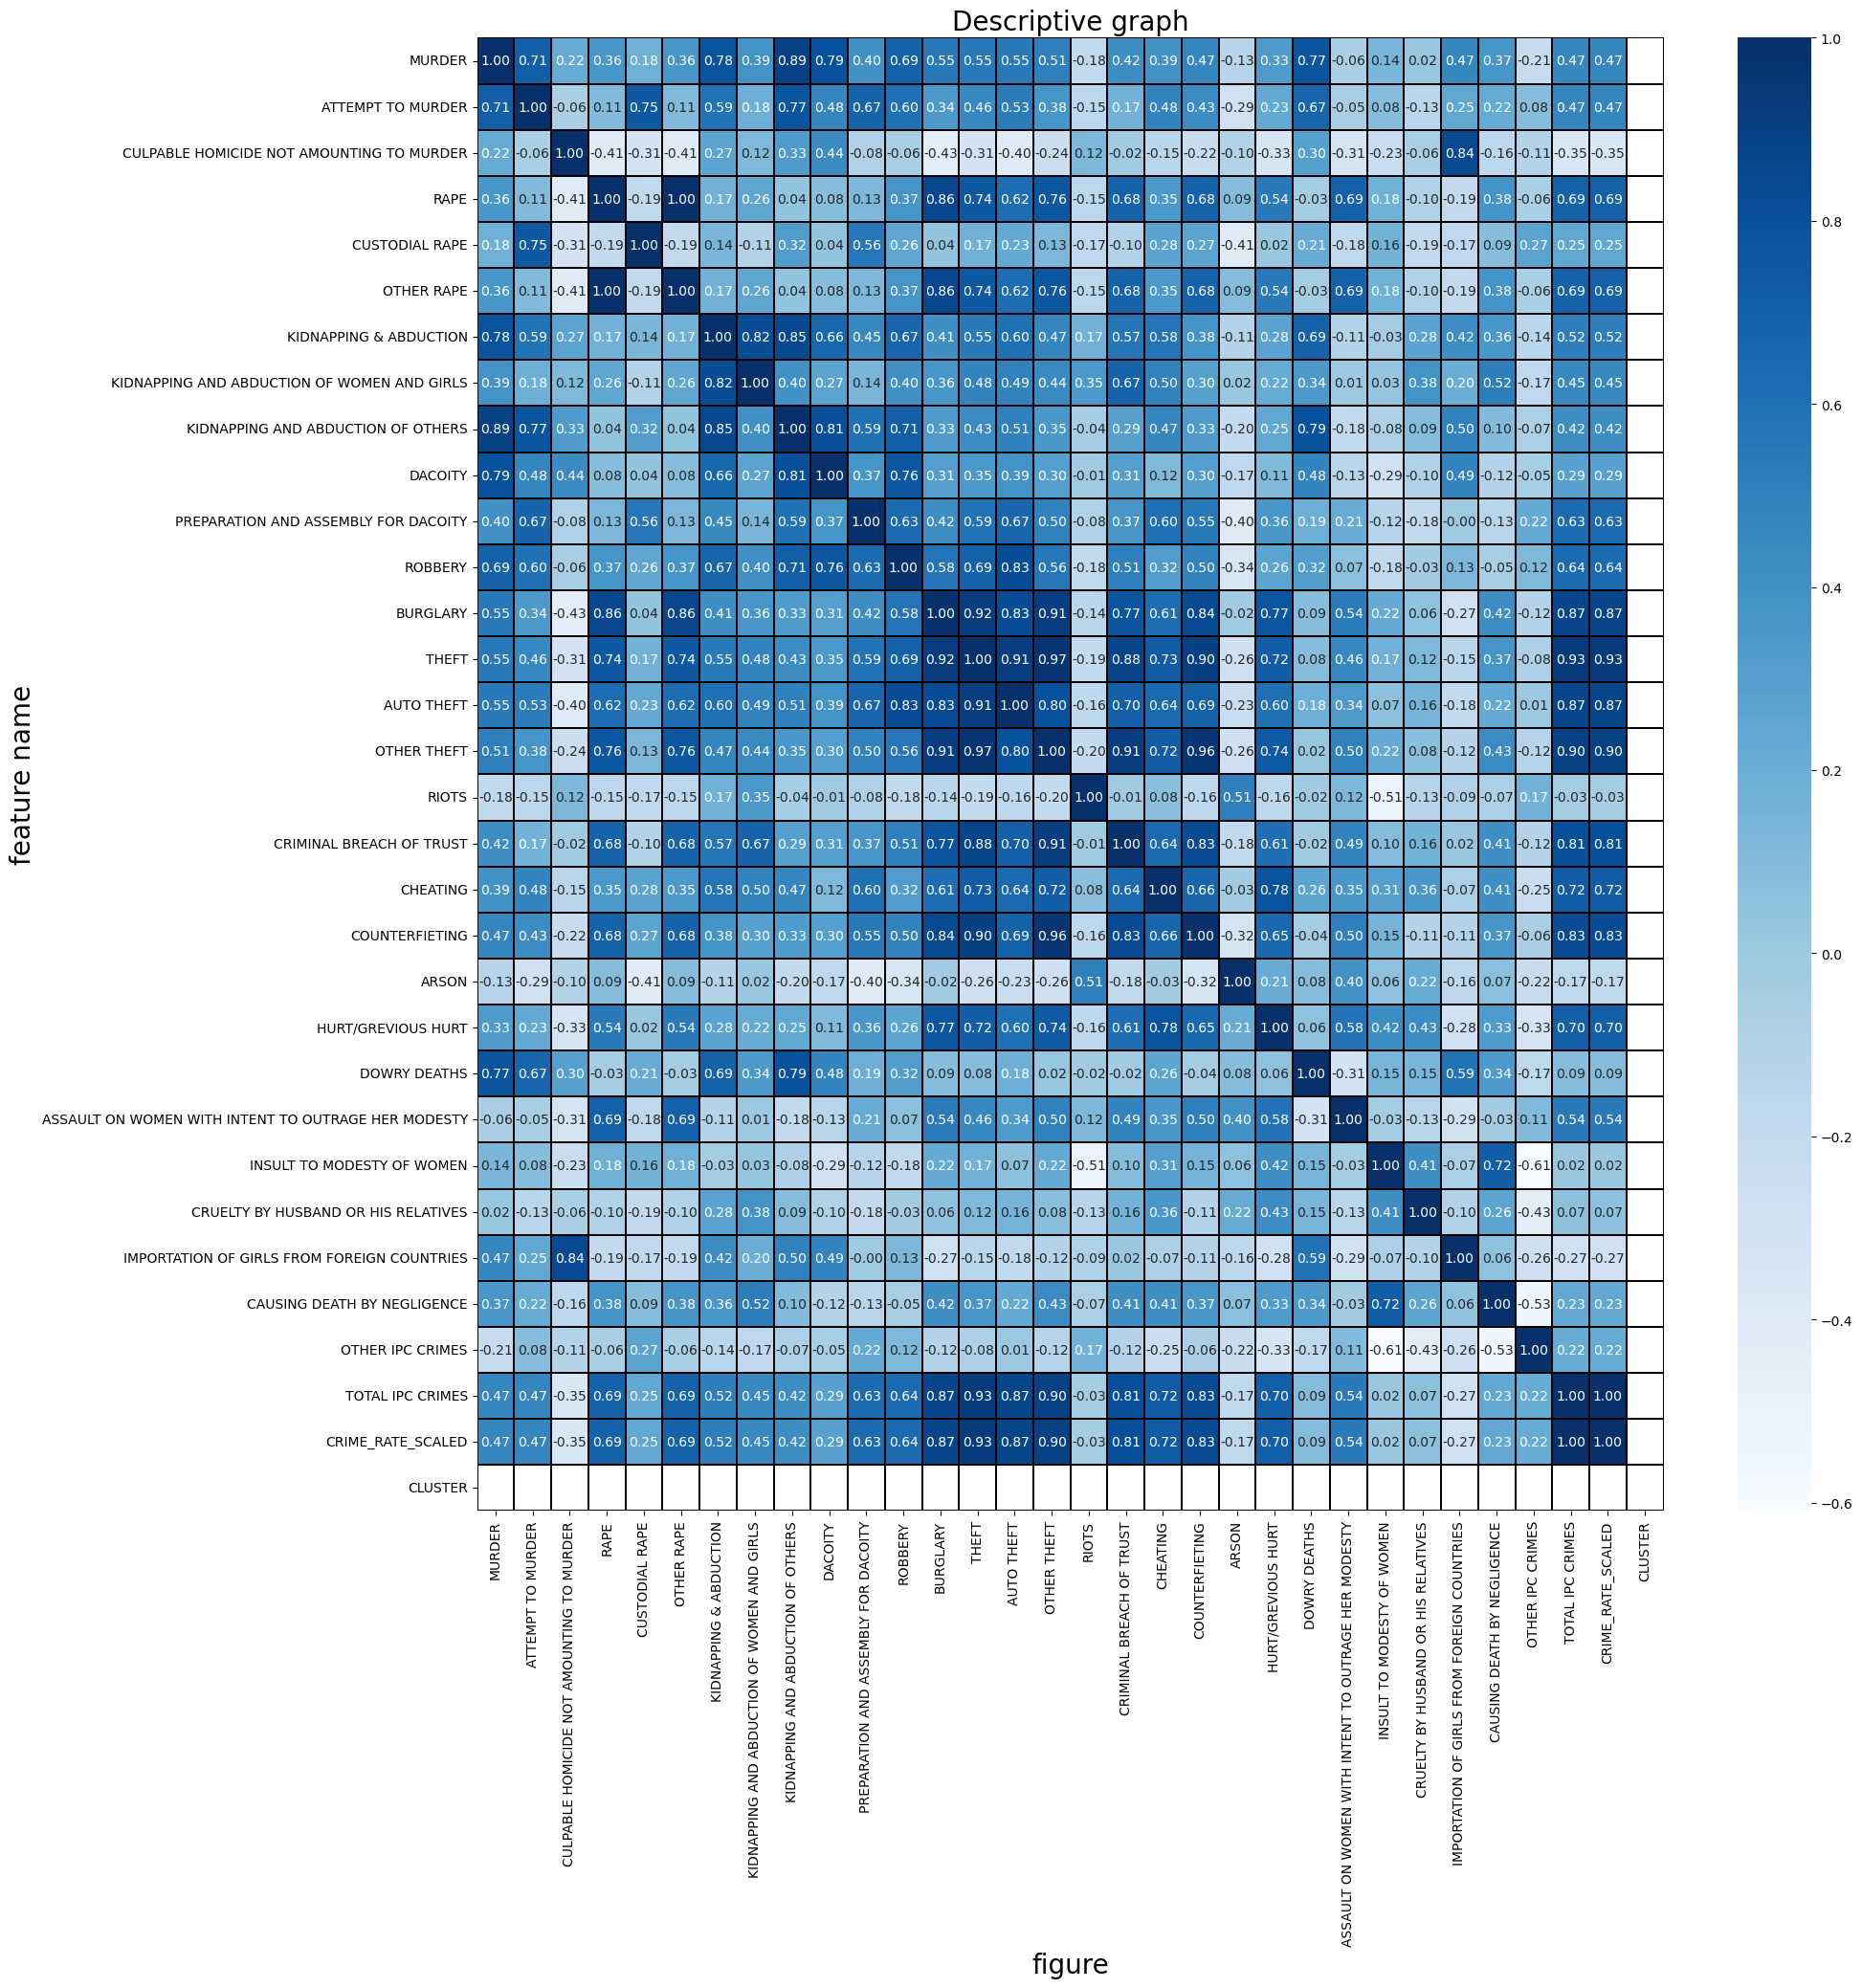

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(sensitive_area.iloc[:,2:-1].corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

The below stats shows the most Dangerous area, which is "MUMBAI COMMR." present in "Maharashtra"

and

The most peaceful area, which is "CID" present in "Manipur"

In [17]:
most_crime_sensitive = sensitive_area.loc[sensitive_area['TOTAL IPC CRIMES'].idxmax()]


least_crime_peaceful = peaceful_area.loc[peaceful_area['TOTAL IPC CRIMES'].idxmin()]


print("Most crime rate district in sensitive areas:")
print(most_crime_sensitive[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']])

print("\nLeast crime rate district in peaceful areas:")
print(least_crime_peaceful[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']])

Most crime rate district in sensitive areas:
STATE/UT              MAHARASHTRA
DISTRICT            MUMBAI COMMR.
TOTAL IPC CRIMES          31810.0
Name: 463, dtype: object

Least crime rate district in peaceful areas:
STATE/UT            MANIPUR
DISTRICT                CID
TOTAL IPC CRIMES        1.8
Name: 493, dtype: object


**GRAPHS**

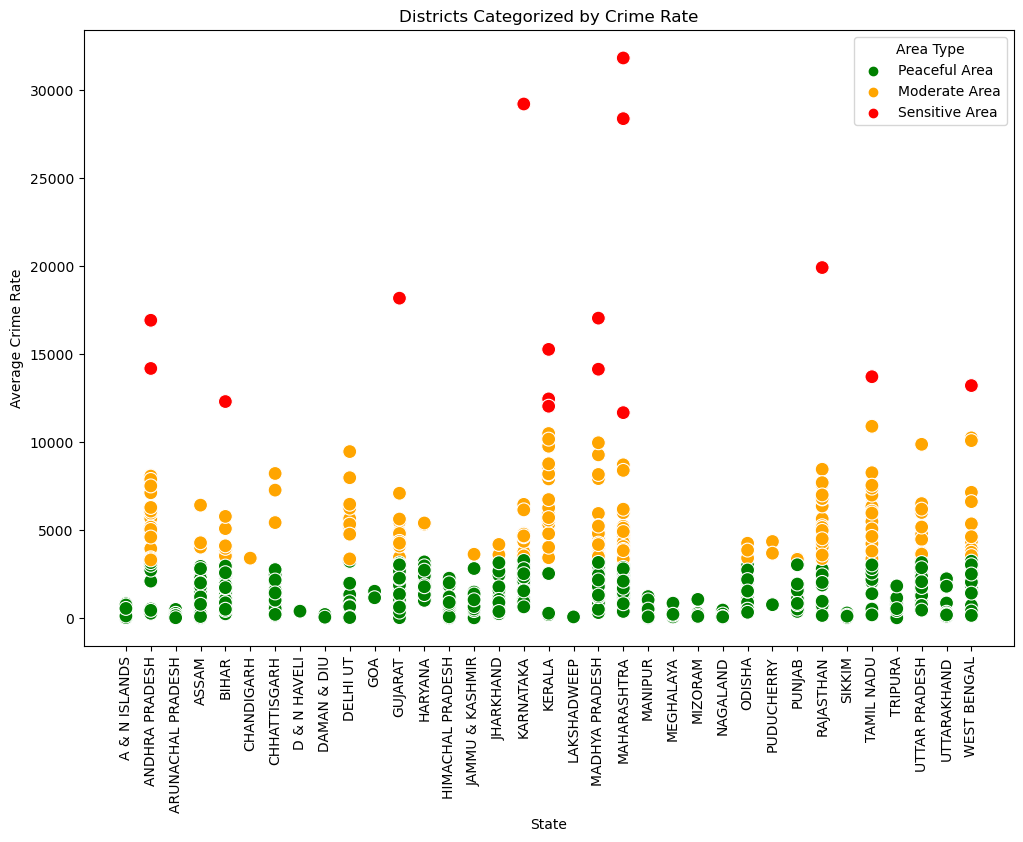

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='STATE/UT', 
    y='TOTAL IPC CRIMES', 
    hue='AREA_TYPE', 
    data=district_crime_data,
    palette={'Peaceful Area': 'green', 'Moderate Area': 'orange', 'Sensitive Area': 'red'},
    s=100
)
plt.title('Districts Categorized by Crime Rate')
plt.xlabel('State')
plt.ylabel('Average Crime Rate')
plt.xticks(rotation=90)
plt.legend(title='Area Type')
plt.show()

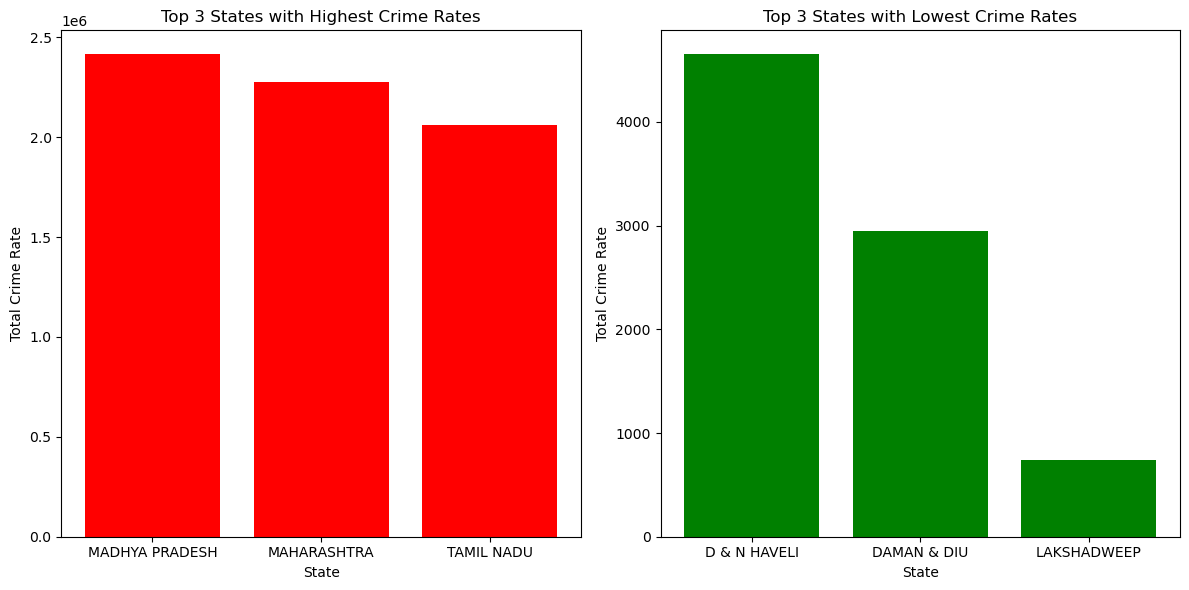

In [19]:
state_crime_data = data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()

# Sort states based on total crime rate
sorted_state_crime_data = state_crime_data.sort_values(by='TOTAL IPC CRIMES', ascending=False)

# Select top 3 and bottom 3 states
top_3_states = sorted_state_crime_data.head(3)
bottom_3_states = sorted_state_crime_data.tail(3)

# Plotting
plt.figure(figsize=(12, 6))

# Top 3 states with highest crime rates
plt.subplot(1, 2, 1)
plt.bar(top_3_states['STATE/UT'], top_3_states['TOTAL IPC CRIMES'], color='red')
plt.title('Top 3 States with Highest Crime Rates')
plt.xlabel('State')
plt.ylabel('Total Crime Rate')

# Bottom 3 states with lowest crime rates
plt.subplot(1, 2, 2)
plt.bar(bottom_3_states['STATE/UT'], bottom_3_states['TOTAL IPC CRIMES'], color='green')
plt.title('Top 3 States with Lowest Crime Rates')
plt.xlabel('State')
plt.ylabel('Total Crime Rate')

plt.tight_layout()
plt.show()

We can see that states with most crime rate and cities with least crime rate

**THE END**